In [2]:
%load_ext autoreload

[*********************100%***********************]  1 of 1 completed


/var/folders/hg/vhqn5pl92qv78k18d78wk8x00000gq/T/ipykernel_66575/113923210.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



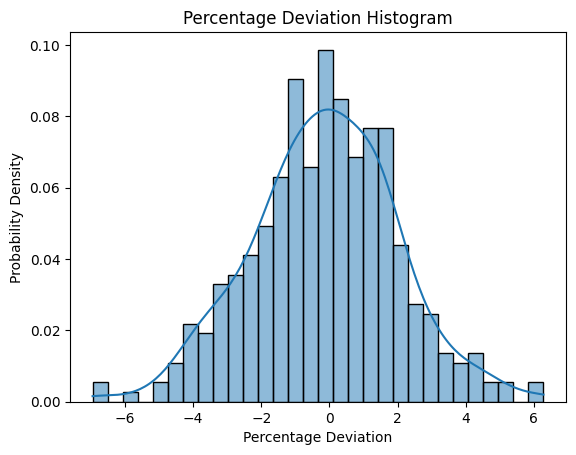

/var/folders/hg/vhqn5pl92qv78k18d78wk8x00000gq/T/ipykernel_66575/113923210.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



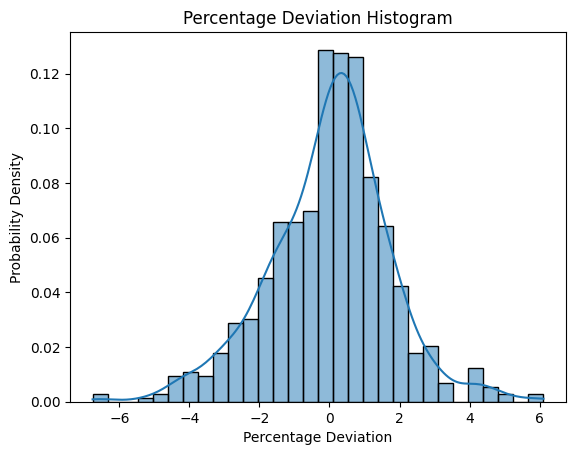

/var/folders/hg/vhqn5pl92qv78k18d78wk8x00000gq/T/ipykernel_66575/113923210.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



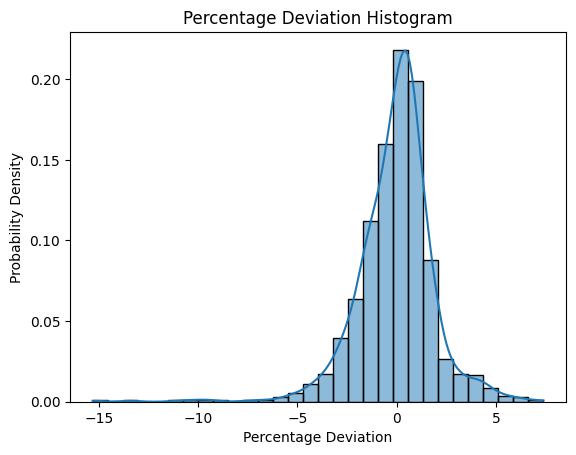

/var/folders/hg/vhqn5pl92qv78k18d78wk8x00000gq/T/ipykernel_66575/113923210.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



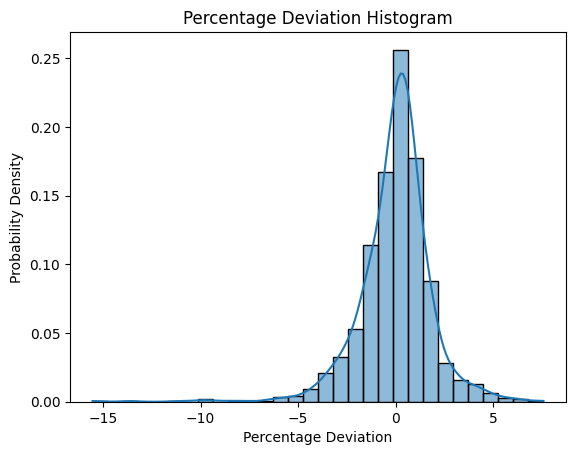

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from machine_learning_finance import TraderEnv, plot_expert, slice_dataframe_to_range
import yfinance as yf
import datetime
import pandas as pd
from plotly.offline import init_notebook_mode
from statsmodels.tsa.seasonal import seasonal_decompose

init_notebook_mode(connected=True)
pd.set_option('display.max_rows', 800)

%autoreload 2
symbol = "SPY"
tickerObj = yf.download(tickers=symbol, interval="1d")
df_full = pd.DataFrame(tickerObj)



for x in range(1, 5):
    df = df_full.tail(365 * x)
    result = seasonal_decompose(df['Close'], model='additive', period=30, extrapolate_trend='freq')
    residuals = result.resid
    percentage_deviations = residuals / result.trend * 100
    df["percentage_deviation"] = percentage_deviations

    # Create a histogram of the percentage deviations with normalized y-axis
    sns.histplot(data=df, x="percentage_deviation", kde=True, bins=30, stat="probability")

    # Set the title and labels for the chart
    plt.title("Percentage Deviation Histogram")
    plt.xlabel("Percentage Deviation")
    plt.ylabel("Probability Density")

    # Display the chart
    plt.show()


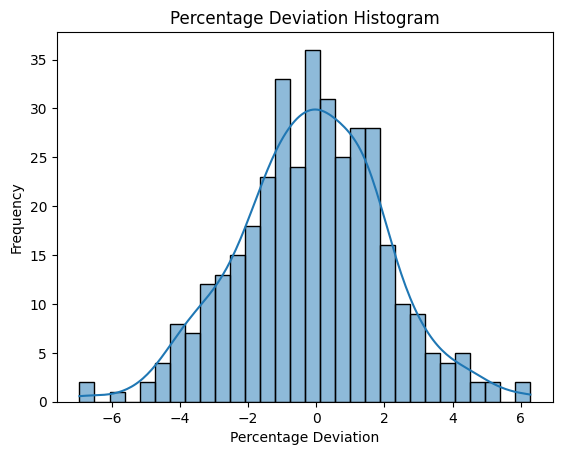